# <FONT COLOR="red">***API-JSON EXAMPLE OF TEMPERATURE, HUMIDITY AND HEAT INDEX***</FONT>
---
---
The [original notebook](https://colab.research.google.com/drive/1d0KSOlzDgLYtyih1oY2fKgMMlhoDZvbW?usp=sharing) was presented by *Andrés Felipe Escallon Portilla*, teacher of the *Artificial Intelligence - Integrative Level - G1* based on the notebook created bu *Julian Valencia*.

From this point on, the content presented is my intellectual property.

How a definition to take context of the dataset information: "The heat index, or wind chill, provides information about the level of heat that is felt... It is a measure of air temperature in relation to relative humidity for a particular day..." by [Heat index (wind chill)](https://www.cigna.com/es-us/knowledge-center/hw/ndice-de-calor-sth149651) page.

## <FONT COLOR="orange">**Load Data**</FONT>
---
---

The first step, as always, is to import the necessary libraries.

In [69]:
# IMPORT COMMON LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

# IMPORT LIBRARIES TO OBTAIN DATA
import requests as req

# IMPORT MODEL LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression

# IMPORT METRICS
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, confusion_matrix

The second step corresponds to the loading of data, in this particular case, through the consumption of an API.

In [2]:
# SAVE THE API URL
api = "http://idc.ventusarca.com.co/getdata2.php"

# REALIZE A REQUEST TO THE API
res = req.get(api)
if res.status_code == 200:
  data_json = res.json()
else:
  print(f'Request error: {res.status_code}')

In [3]:
# CREATE OF THE PANDAS DATAFRAME
df = pd.DataFrame(data_json)

# DISPLAY DATAFRAME
display(df)

,id,fecha,temperatura,humedad,heatIndex
0,5560,2024-10-13 22:11:34,21.8,65,21.73
1,5559,2024-10-13 21:41:34,21.8,69,21.84
2,5558,2024-10-13 07:52:08,19.6,93,20.04
3,5557,2024-10-13 07:22:07,19.5,93,19.93
4,5556,2024-10-13 06:52:07,19.2,93,19.6
...,...,...,...,...,...
5555,5,2024-06-13 20:38:03,24.4,73,24.8
5556,4,2024-06-13 20:08:02,24.2,75,24.63
5557,3,2024-06-13 19:38:01,23.4,78,23.83
5558,2,2024-06-13 19:08:01,23.9,76,24.33


## <FONT COLOR="orange">**Exploratory Data Analysis (EDA)**</FONT>
---
---

To realize a good EDA, it is important to understand the column distribution and the correlation between the target and the features in the real data. For this reason, the first step is to analyze whether any null record may exist on the dataset.

In [4]:
# REVIEW NULL DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5560 entries, 0 to 5559
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           5560 non-null   object
 1   fecha        5560 non-null   object
 2   temperatura  5560 non-null   object
 3   humedad      5560 non-null   object
 4   heatIndex    5560 non-null   object
dtypes: object(5)
memory usage: 217.3+ KB


In [5]:
# DROP ID COLUMN
df_copy = df.copy()
df_copy.drop(labels=['id','fecha'] ,axis=1, inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5560 entries, 0 to 5559
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   temperatura  5560 non-null   object
 1   humedad      5560 non-null   object
 2   heatIndex    5560 non-null   object
dtypes: object(3)
memory usage: 130.4+ KB


In [6]:
# DISPLAY THE DATAFRAME COPY
display(df_copy)

,temperatura,humedad,heatIndex
0,21.8,65,21.73
1,21.8,69,21.84
2,19.6,93,20.04
3,19.5,93,19.93
4,19.2,93,19.6
...,...,...,...
5555,24.4,73,24.8
5556,24.2,75,24.63
5557,23.4,78,23.83
5558,23.9,76,24.33


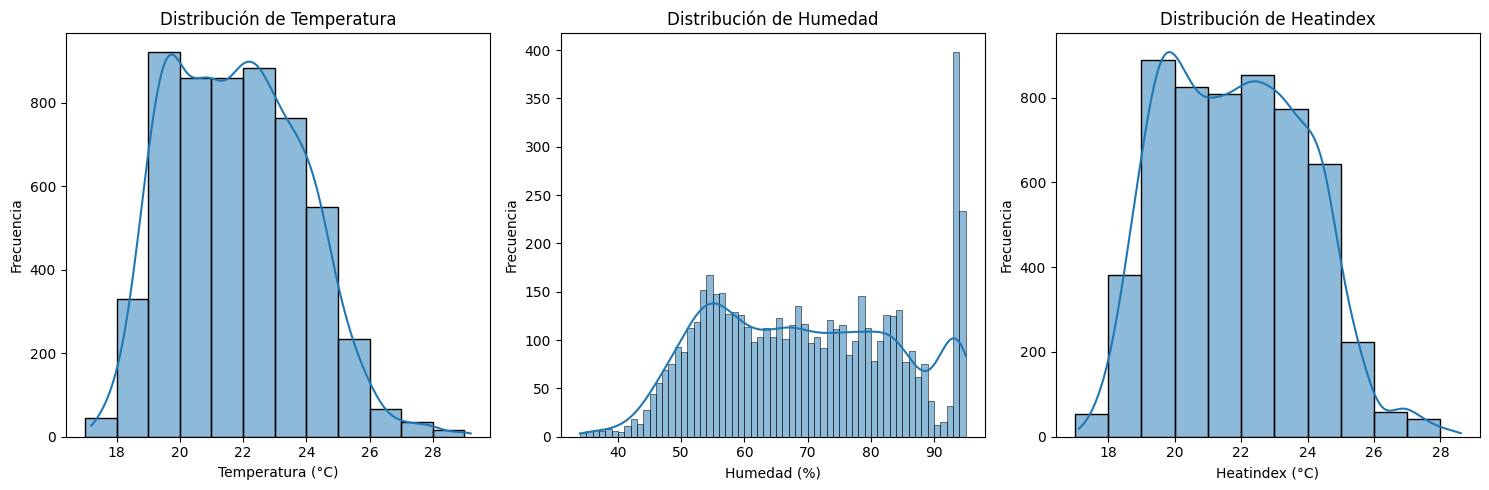

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'temperatura', 'humedad', and 'heatIndex' columns to numeric
df_copy['temperatura'] = pd.to_numeric(df_copy['temperatura'])
df_copy['humedad'] = pd.to_numeric(df_copy['humedad'])
df_copy['heatIndex'] = pd.to_numeric(df_copy['heatIndex'])

# Definir los rangos para cada variable
temp_bins = range(int(df_copy['temperatura'].min()), int(df_copy['temperatura'].max()) + 1,1)  # Rangos de 5 para temperatura
hum_bins = range(int(df_copy['humedad'].min()), int(df_copy['humedad'].max()) + 1,1)  # Rangos de 10 para humedad
heatindex_bins = range(int(df_copy['heatIndex'].min()), int(df_copy['heatIndex'].max()) + 1,1)  # Rangos de 5 para heatindex

# Crear los gráficos de distribución
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico de distribución de temperatura
sns.histplot(df_copy['temperatura'], kde=True, bins=temp_bins, ax=axes[0])
axes[0].set_title('Distribución de Temperatura')
axes[0].set_xlabel('Temperatura (°C)')
axes[0].set_ylabel('Frecuencia')

# Gráfico de distribución de humedad
sns.histplot(df_copy['humedad'], kde=True, bins=hum_bins, ax=axes[1])
axes[1].set_title('Distribución de Humedad')
axes[1].set_xlabel('Humedad (%)')
axes[1].set_ylabel('Frecuencia')

# Gráfico de distribución de heatindex
sns.histplot(df_copy['heatIndex'], kde=True, bins=heatindex_bins, ax=axes[2])
axes[2].set_title('Distribución de Heatindex')
axes[2].set_xlabel('Heatindex (°C)')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

As can be seen, there are no outliers in the distributions of each of the characteristics and the target, so it is not necessary to create a box plot.

The correlation matrix of the characteristics with the target is presented below.

In [8]:
# CORRELATATION MATRIX FUNCTION
def corr_matrix(df:pd.DataFrame)->None:
    # CREATE FIGURE
    plt.figure(figsize = (7,7))

    # CORRELATION MATRIX
    cor = df.corr()

    # CORRELATION MATRIX FIGURE
    sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
    plt.title('Correlation Matrix')
    plt.show()

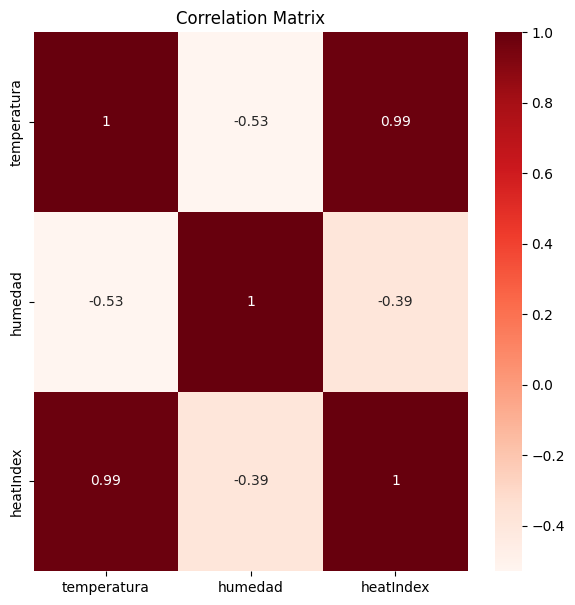

In [9]:
corr_matrix(df_copy)

## <FONT COLOR="orange">**Prediction of Heat Index with temperature**
---
---

In this section you can find the implementation of three models (Linear Regression, Polynomial Regression, and Logaritmic Regression). All models are implemented on rely in the temperature feature.

In [10]:
# CREATE THE TEMPERATURE DATASET
df_temp = df_copy.copy()
df_temp.drop(labels=['humedad'], axis=1, inplace=True)
display(df_temp)

,temperatura,heatIndex
0,21.8,21.73
1,21.8,21.84
2,19.6,20.04
3,19.5,19.93
4,19.2,19.60
...,...,...
5555,24.4,24.80
5556,24.2,24.63
5557,23.4,23.83
5558,23.9,24.33


In [11]:
# SELECT FEATURES AND LABELS
x = df_temp['temperatura']
y = df_temp['heatIndex']

# TRAIN AND TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# RECONFIGURE THE MINIDATASETS
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [12]:
# METRIC FUNCTIONS
def metrics (real:np.ndarray, prediction:np.ndarray) -> np.ndarray:
  # CALCULATE METRICS
  mse = mean_squared_error(real,prediction)
  rmse = np.sqrt(mse)
  msa = mean_absolute_error(real,prediction)
  r2 = r2_score(real, prediction)

  return np.array([mse,rmse,msa,r2])

### <FONT COLOR="lightblue">*Linear Regression Model*</FONT>
---
---

In [13]:
# CREATE LINEAR REGRESSION MODEL
lr_model_temp = LinearRegression(n_jobs=-1)

# TRAIN AND TEST MODEL
lr_model_temp.fit(x_train, y_train)
lr_prediction_temp = lr_model_temp.predict(x_test)

In [14]:
def model_figure(feature:np.ndarray, target:np.ndarray, prediction:np.ndarray, x_label:str, y_label:str, title:str) -> None:
  # CREATE THE FIGURE
  plt.figure(figsize=(10,6))

  # REAL DATA
  plt.scatter(feature, target, label='Real Data', color='blue', linewidth=2)

  # LINEAR REGRESION
  plt.plot(feature, prediction, label='Linear Regression Prediction', color='red', linewidth=2)

  # TAGS
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.legend()

  # GRID
  plt.minorticks_on()
  plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
  plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

  # REMOVE TOP AND LEFT BORDER
  sns.despine()

  # SHOW THE FIGURE
  plt.show()
  plt.close()
  gc.collect()

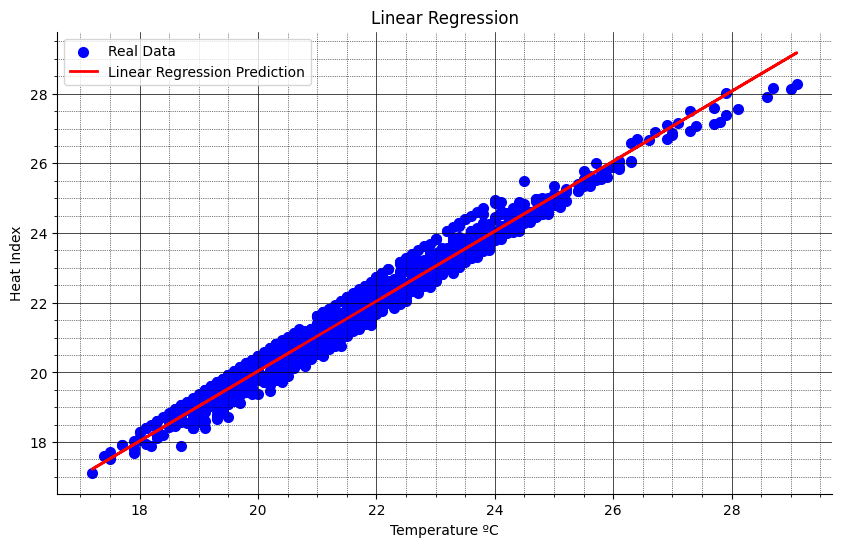

In [15]:
# TEMPERATURE LINEAR REGRESSION MODEL
model_figure(feature=x_test, target=y_test, prediction=lr_prediction_temp, x_label='Temperature ºC', y_label='Heat Index', title='Linear Regression')

In [16]:
# METRICS
lr_metrics_temp = metrics(real=y_test, prediction=lr_prediction_temp)

print(f'Mean Square Error (MSE): {lr_metrics_temp[0]:.4f}')
print(f'Root Mean Square Error (RMSE): {lr_metrics_temp[1]:.4f}')
print(f'Mean Absolute Error (MSA): {lr_metrics_temp[2]:.4f}')
print(f'Determination Coefficient (R2): {lr_metrics_temp[3]:.4f}')

Mean Square Error (MSE): 0.1156
Root Mean Square Error (RMSE): 0.3399
Mean Absolute Error (MSA): 0.2814
Determination Coefficient (R2): 0.9736


### <FONT COLOR="lightblue">*Polynomical Regression*</FONT>
---
---

In [17]:
# POLYNOMIAL REGRESSION MODEL
def polynomial_regression(degree:int, features_train:np.ndarray, target_train:np.ndarray, features_test:np.ndarray, target_test:np.ndarray, x_label:str):

  # POLYNOMIAL CONFIGURATION
  poly_model = PolynomialFeatures(degree=degree)

  # FIT MODEL --> OBTAIN POLY FEATURES
  poly_features_train = poly_model.fit_transform(features_train)
  poly_features_test = poly_model.fit_transform(features_test)

  # MODEL CREATION, TRAIN, AND PREDICT
  model = LinearRegression()
  model.fit(poly_features_train, target_train)
  y_pred = model.predict(poly_features_test)

  # CREATION FIGURE
  model_figure(feature=features_test, target=target_test, prediction=y_pred, x_label=x_label, y_label='Heat Index', title=f'Polynomial Regression - Degree = {degree}')

  # METRICS RESULTS
  poly_metrics = metrics(real=target_test, prediction=y_pred)

  # PRINT RESULTS
  print(f'Mean Square Error (MSE): {poly_metrics[0]:.4f}')
  print(f'Root Mean Square Error (RMSE): {poly_metrics[1]:.4f}')
  print(f'Mean Absolute Error (MSA): {poly_metrics[2]:.4f}')
  print(f'Determination Coefficient (R2): {poly_metrics[3]:.4f}')

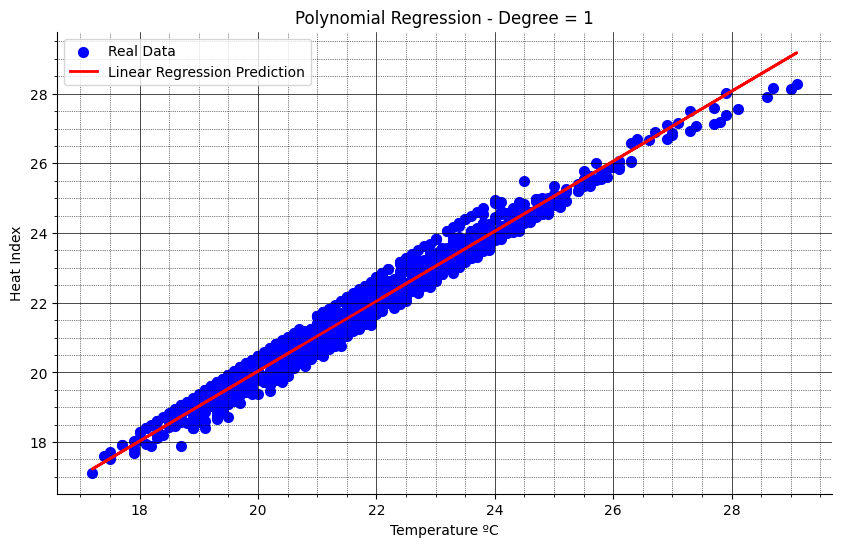

Mean Square Error (MSE): 0.1156
Root Mean Square Error (RMSE): 0.3399
Mean Absolute Error (MSA): 0.2814
Determination Coefficient (R2): 0.9736






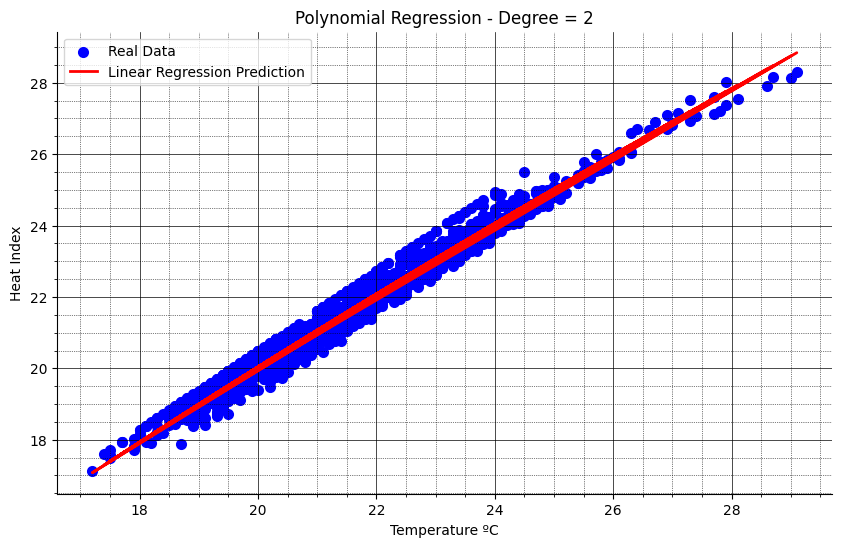

Mean Square Error (MSE): 0.1126
Root Mean Square Error (RMSE): 0.3355
Mean Absolute Error (MSA): 0.2805
Determination Coefficient (R2): 0.9743






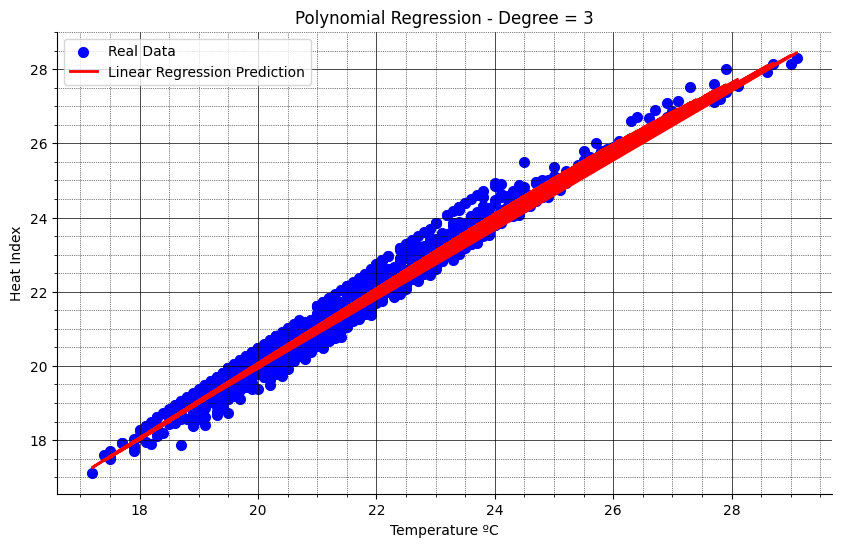

Mean Square Error (MSE): 0.1106
Root Mean Square Error (RMSE): 0.3325
Mean Absolute Error (MSA): 0.2781
Determination Coefficient (R2): 0.9747




In [18]:
# LOOP TO CREATE 3 POLYNOMIAL MODELS
for i in range(1,4):
  print('\n')
  polynomial_regression(degree=i, features_train=x_train, features_test=x_test, target_train=y_train, target_test=y_test, x_label='Temperature ºC')
  print('\n')

### <FONT COLOR="lightblue">*Logarithmic regression*</FONT>
---
---

In [19]:
# TRAIN AND TEST FEATURES TRANSFORMATION
x_train_log = np.log(x_train)
x_test_log = np.log(x_test)

In [20]:
# CREATE LOGARITHMIC REGRESSION MODEL
log_model_temp = LinearRegression(n_jobs=-1)

# TRAIN AND TEST MODEL
log_model_temp.fit(x_train_log, y_train)
log_prediction_temp = log_model_temp.predict(x_test_log)

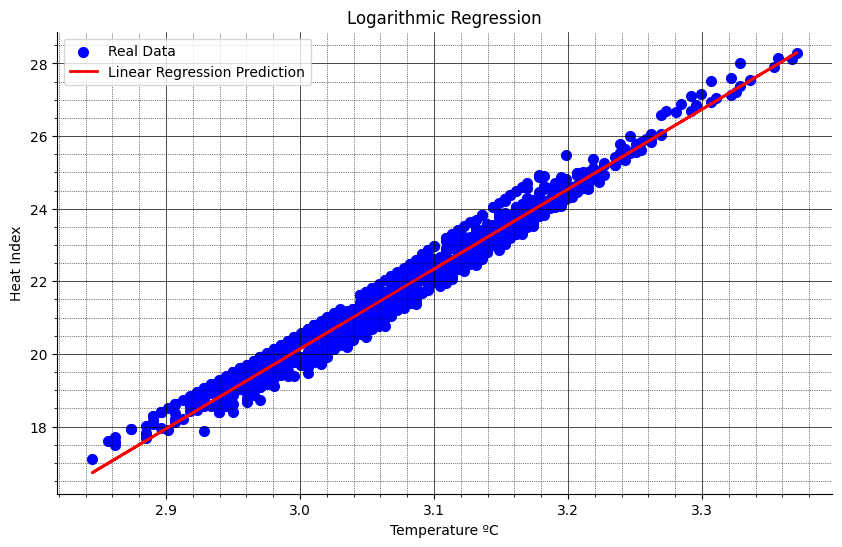

In [21]:
# FIGURE
model_figure(feature=x_test_log, target=y_test, prediction=log_prediction_temp, x_label='Temperature ºC', y_label='Heat Index', title='Logarithmic Regression')

In [22]:
# METRICS
log_metrics_temp = metrics(real=y_test, prediction=log_prediction_temp)
print(f'Mean Square Error (MSE): {lr_metrics_temp[0]:.4f}')
print(f'Root Mean Square Error (RMSE): {lr_metrics_temp[1]:.4f}')
print(f'Mean Absolute Error (MSA): {lr_metrics_temp[2]:.4f}')
print(f'Determination Coefficient (R2): {lr_metrics_temp[3]:.4f}')

Mean Square Error (MSE): 0.1156
Root Mean Square Error (RMSE): 0.3399
Mean Absolute Error (MSA): 0.2814
Determination Coefficient (R2): 0.9736


## <FONT COLOR="orange">**Prediction of Heat Index with humidity**
---
---

In this section you can find the implementation of three models (Linear Regression, Polynomial Regression, and Logaritmic Regression). All models are implemented on rely in the humidity feature.

In [23]:
# CREATE THE TEMPERATURE DATASET
df_hum = df_copy.copy()
df_hum.drop(labels=['temperatura'], axis=1, inplace=True)
display(df_hum)

,humedad,heatIndex
0,65,21.73
1,69,21.84
2,93,20.04
3,93,19.93
4,93,19.60
...,...,...
5555,73,24.80
5556,75,24.63
5557,78,23.83
5558,76,24.33


In [24]:
# SELECT FEATURES AND LABELS
x_hum = df_hum['humedad']
y_hum = df_hum['heatIndex']

# TRAIN AND TEST SPLIT
x_hum_train, x_hum_test, y_hum_train, y_hum_test = train_test_split(x_hum, y_hum, test_size=0.2, random_state=42)

# RECONFIGURE THE MINIDATASETS
x_hum_train = x_hum_train.values.reshape(-1, 1)
x_hum_test = x_hum_test.values.reshape(-1, 1)
y_hum_train = y_hum_train.values.reshape(-1, 1)
y_hum_test = y_hum_test.values.reshape(-1, 1)

### <FONT COLOR="lightblue">*Linear Regression Model*</FONT>
---
---

In [25]:
# CREATE LINEAR REGRESSION MODEL
lr_model_hum = LinearRegression(n_jobs=-1)

# TRAIN AND TEST MODEL
lr_model_hum.fit(x_hum_train, y_hum_train)
lr_prediction_hum = lr_model_hum.predict(x_hum_test)

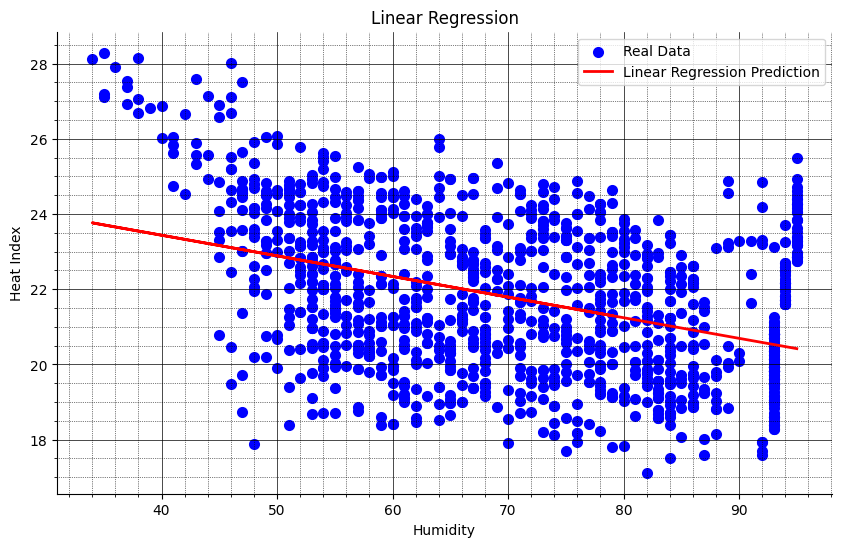

In [26]:
# TEMPERATURE LINEAR REGRESSION MODEL
model_figure(feature=x_hum_test, target=y_hum_test, prediction=lr_prediction_hum, x_label='Humidity', y_label='Heat Index', title='Linear Regression')

In [27]:
# METRICS
lr_metrics_hum = metrics(real=y_hum_test, prediction=lr_prediction_hum)

print(f'Mean Square Error (MSE): {lr_metrics_hum[0]:.4f}')
print(f'Root Mean Square Error (RMSE): {lr_metrics_hum[1]:.4f}')
print(f'Mean Absolute Error (MSA): {lr_metrics_hum[2]:.4f}')
print(f'Determination Coefficient (R2): {lr_metrics_hum[3]:.4f}')

Mean Square Error (MSE): 3.6572
Root Mean Square Error (RMSE): 1.9124
Mean Absolute Error (MSA): 1.6132
Determination Coefficient (R2): 0.1642


### <FONT COLOR="lightblue">*Polynomical Regression*</FONT>
---
---

In [28]:
# LOOP TO CREATE 3 POLYNOMIAL MODELS
for i in range(1,16):
  print('\n')
  polynomial_regression(degree=i, features_train=x_hum_train, features_test=x_hum_test, target_train=y_hum_train, target_test=y_hum_test, x_label='Humidity')
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

### <FONT COLOR="lightblue">*Logarithmic regression*</FONT>
---
---

In [29]:
# TRAIN AND TEST FEATURES TRANSFORMATION
x_hum_train_log = np.log(x_hum_train)
x_hum_test_log = np.log(x_hum_test)

In [30]:
# CREATE LOGARITHMIC REGRESSION MODEL
log_model_hum = LinearRegression(n_jobs=-1)

# TRAIN AND TEST MODEL
log_model_hum.fit(x_hum_train_log, y_train)
log_prediction_hum = log_model_hum.predict(x_hum_test_log)

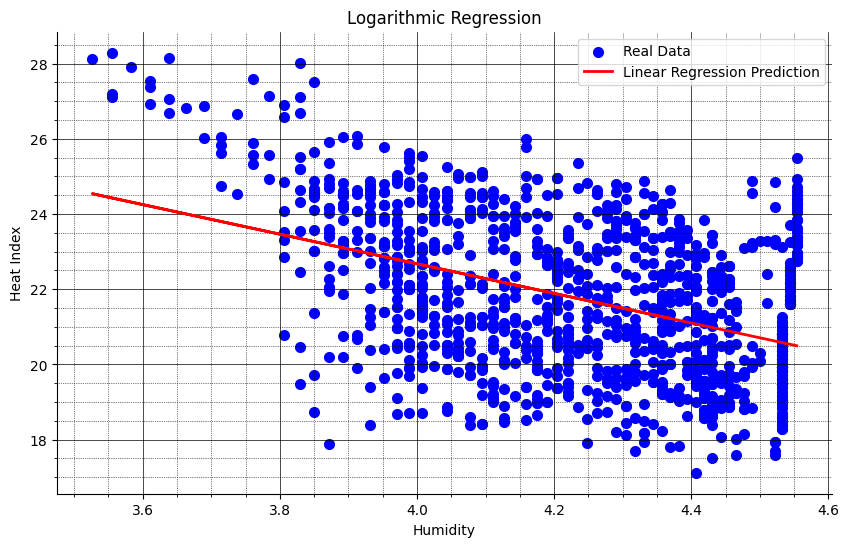

In [31]:
# FIGURE
model_figure(feature=x_hum_test_log, target=y_test, prediction=log_prediction_hum, x_label='Humidity', y_label='Heat Index', title='Logarithmic Regression')

In [32]:
# METRICS
log_metrics_hum = metrics(real=y_hum_test, prediction=log_prediction_hum)
print(f'Mean Square Error (MSE): {lr_metrics_hum[0]:.4f}')
print(f'Root Mean Square Error (RMSE): {lr_metrics_hum[1]:.4f}')
print(f'Mean Absolute Error (MSA): {lr_metrics_hum[2]:.4f}')
print(f'Determination Coefficient (R2): {lr_metrics_hum[3]:.4f}')

Mean Square Error (MSE): 3.6572
Root Mean Square Error (RMSE): 1.9124
Mean Absolute Error (MSA): 1.6132
Determination Coefficient (R2): 0.1642


## <FONT COLOR="orange">**Classification with Logistic Regression**</FONT>
---
---

In this section you can find the implementation of the classification with the logistic regression model based on the new column called windChill.

In [47]:
# CREATE A COPY OF THE ORIGINAL DATASET
df_wind_chill = df.copy()

# CONVERT 'heatIndex' COLUMN TO NUMERIC
df_wind_chill['heatIndex'] = pd.to_numeric(df_wind_chill['heatIndex'], errors='coerce')

# DEFINE LIMITS FOR EACH CATEGORY based on descriptive statistics
bins = [df_wind_chill['heatIndex'].min(), 20, 21.77, 23.42, df_wind_chill['heatIndex'].max()]
labels = ['Very low', 'Low', 'Medium', 'High'] # Adjusted labels to match 4 bins

# CREATE THE NEW COLUMN
df_wind_chill['windChill'] = pd.cut(df_wind_chill['heatIndex'], bins=bins, labels=labels, include_lowest=True, duplicates='drop')

display(df_wind_chill)

,id,fecha,temperatura,humedad,heatIndex,windChill
0,5560,2024-10-13 22:11:34,21.8,65,21.73,Low
1,5559,2024-10-13 21:41:34,21.8,69,21.84,Medium
2,5558,2024-10-13 07:52:08,19.6,93,20.04,Low
3,5557,2024-10-13 07:22:07,19.5,93,19.93,Very low
4,5556,2024-10-13 06:52:07,19.2,93,19.60,Very low
...,...,...,...,...,...,...
5555,5,2024-06-13 20:38:03,24.4,73,24.80,High
5556,4,2024-06-13 20:08:02,24.2,75,24.63,High
5557,3,2024-06-13 19:38:01,23.4,78,23.83,High
5558,2,2024-06-13 19:08:01,23.9,76,24.33,High


### <FONT COLOR="lightblue">*Logistic Regression based on Heat Index*</FONT>
---
---

In [66]:
# DATA PREPARATION
x_class_hi = df_wind_chill[['heatIndex']]
y_class_hi = df_wind_chill['windChill']

# CREATE A LABEL ENCODER OBJECT
encoder = LabelEncoder()

# CODING LABELS
encoder.fit(y_class_hi)
y_class_hi = encoder.transform(y_class_hi)

# SPLIT DATA INTO TRAIN AND TEST SETS
x_class_hi_train, x_class_hi_test, y_class_hi_train, y_class_hi_test = train_test_split(x_class_hi, y_class_hi, test_size=0.2, random_state=42)

In [77]:
# CREATE LOGISTIC REGRESSION MODEL
logR_model_hi = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=20)

# MODEL TRAIN AND TEST
logR_model_hi.fit(x_class_hi_train, y_class_hi_train)
logR_prediction_hi = logR_model_hi.predict(x_class_hi_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [85]:
def plot_confusion_matrix(y_true:np.ndarray, y_pred:np.ndarray, encoder:LabelEncoder) -> None:
  # CALCULATE CONFUSION MATRIX
  cm = confusion_matrix(y_true, y_pred)

  # CREATE FIGURE
  plt.figure(figsize=(8, 6))

  # CONFUSION MATRIX
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=encoder.classes_, yticklabels=encoder.classes_, linewidths=1, linecolor='black')

  # TAGS
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix")

  # CLOSE GRAPH AND FREE MEMORY
  plt.show()
  plt.close()
  gc.collect()

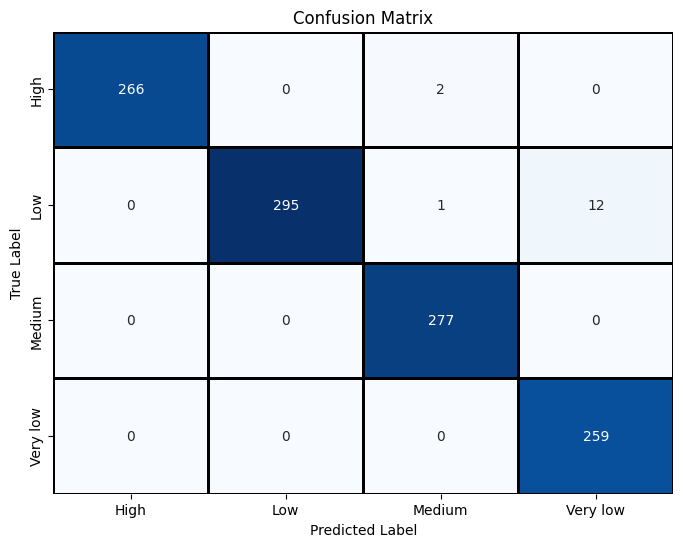

In [87]:
# FIGURE OF CONFUSION MATRIX
plot_confusion_matrix(y_true=y_class_hi_test, y_pred=logR_prediction_hi, encoder=encoder)

In [88]:
# METRICS
report = classification_report(y_class_hi_test, logR_prediction_hi)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       268
           1       1.00      0.96      0.98       308
           2       0.99      1.00      0.99       277
           3       0.96      1.00      0.98       259

    accuracy                           0.99      1112
   macro avg       0.99      0.99      0.99      1112
weighted avg       0.99      0.99      0.99      1112



### <FONT COLOR="lightblue">*Logistic Regression based on Humidity, Temperature, and Heat Index*</FONT>
---
---

In [89]:
# DATA PREPARATION
x_class_all = df_wind_chill[['humedad', 'temperatura', 'heatIndex']]
y_class_all = df_wind_chill['windChill']

# CREATE A LABEL ENCODER OBJECT
encoder = LabelEncoder()

# CODING LABELS
encoder.fit(y_class_all)
y_class_all = encoder.transform(y_class_all)

# SPLIT DATA INTO TRAIN AND TEST SETS
x_class_all_train, x_class_all_test, y_class_all_train, y_class_all_test = train_test_split(x_class_all, y_class_all, test_size=0.2, random_state=42)

In [92]:
# CREATE LOGISTIC REGRESSION MODEL
logR_model_all = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)

# MODEL TRAIN AND TEST
logR_model_all.fit(x_class_all_train, y_class_all_train)
logR_prediction_all = logR_model_all.predict(x_class_all_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


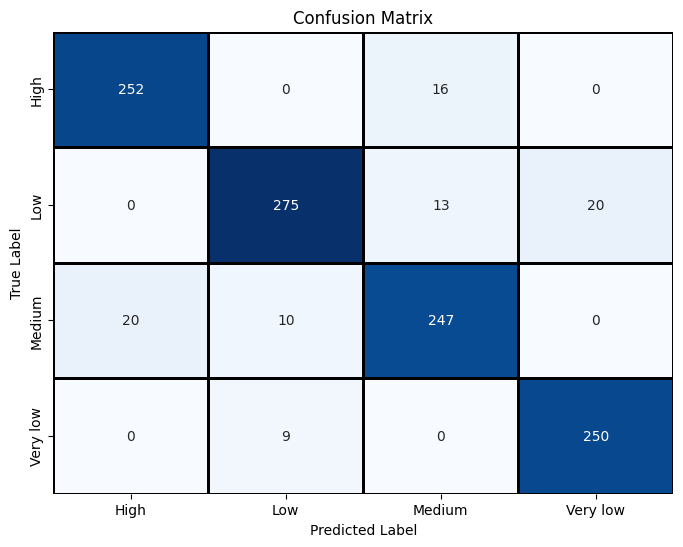

In [93]:
# FIGURE OF CONFUSION MATRIX
plot_confusion_matrix(y_true=y_class_all_test, y_pred=logR_prediction_all, encoder=encoder)

In [94]:
# METRICS
report = classification_report(y_class_all_test, logR_prediction_all)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       268
           1       0.94      0.89      0.91       308
           2       0.89      0.89      0.89       277
           3       0.93      0.97      0.95       259

    accuracy                           0.92      1112
   macro avg       0.92      0.92      0.92      1112
weighted avg       0.92      0.92      0.92      1112



## <FONT COLOR="orange">**Time Series**</FONT>
---
---

In this final section you can find the following time series:

1. Temperature vs Date.
2. Humidity vs Date.
3. Value Index vs Date.
4. Wind Chill vs Date.

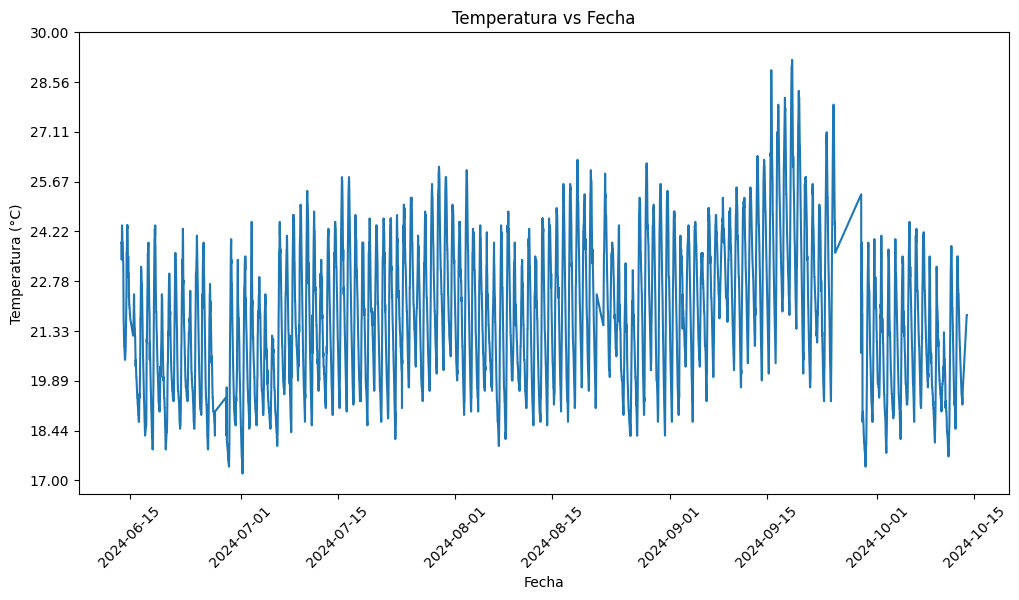

In [100]:
# Convertir la columna 'fecha' a datetime
df_wind_chill['fecha'] = pd.to_datetime(df_wind_chill['fecha'])

# 1. Temperatura vs Fecha
plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha', y='temperatura', data=df_wind_chill)
plt.title('Temperatura vs Fecha')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)

# Ensure 'temperatura' column is numeric
df_wind_chill['temperatura'] = pd.to_numeric(df_wind_chill['temperatura'], errors='coerce')

# Ajustar los límites del eje y para mostrar un rango más amplio
# Option 1: Set explicit y-axis limits with some padding:
# plt.ylim(df_wind_chill['temperatura'].min() - 1, df_wind_chill['temperatura'].max() + 1)

# Option 2: Control the number of ticks using NumPy's linspace:
import numpy as np
import math
min_temp = math.floor(df_wind_chill['temperatura'].min())
max_temp = math.ceil(df_wind_chill['temperatura'].max())
num_ticks = 10  # Adjust this to control the number of ticks
plt.yticks(np.linspace(min_temp, max_temp, num_ticks))

plt.show()

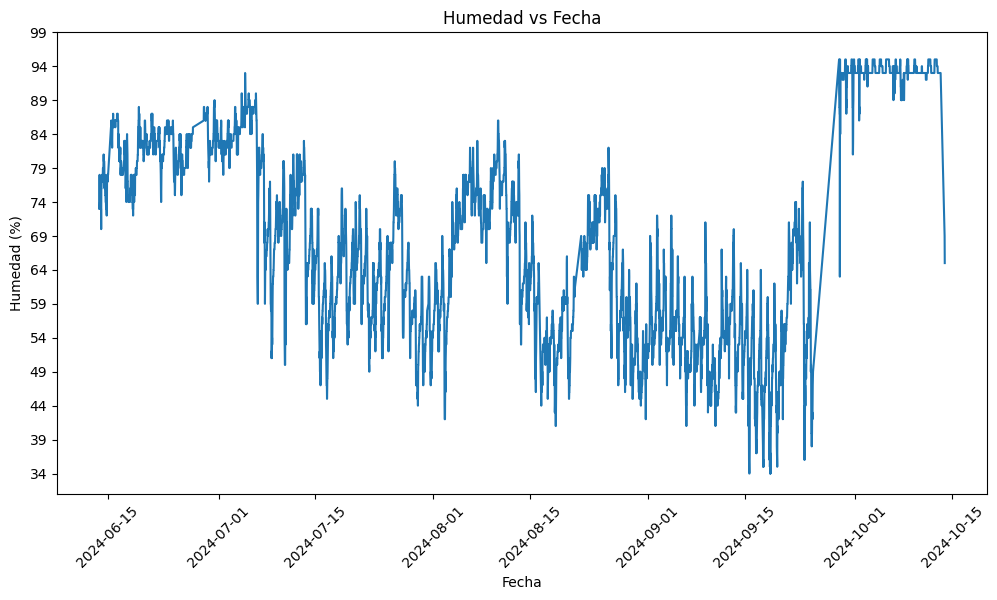

In [104]:
# Importa las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Convertir la columna 'fecha' a datetime
df_wind_chill['fecha'] = pd.to_datetime(df_wind_chill['fecha'])

# 2. Humedad vs Fecha
plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha', y='humedad', data=df_wind_chill)
plt.title('Humedad vs Fecha')
plt.xlabel('Fecha')
plt.ylabel('Humedad (%)')
plt.xticks(rotation=45)

# Asegurarse de que la columna 'humedad' sea numérica
df_wind_chill['humedad'] = pd.to_numeric(df_wind_chill['humedad'], errors='coerce')

# Generar rangos para el eje y con un paso menor
min_humedad = math.floor(df_wind_chill['humedad'].min())
max_humedad = math.ceil(df_wind_chill['humedad'].max())
step = 5  # Define el paso deseado para las marcas en el eje y

# Ajustar las marcas del eje y
plt.yticks(range(min_humedad, max_humedad + step, step))

plt.show()

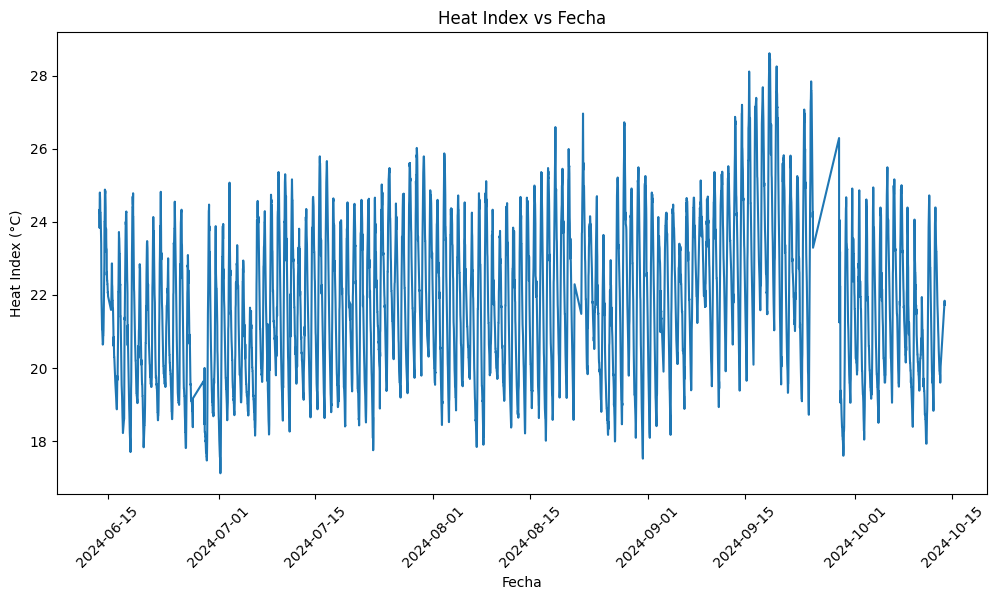

In [105]:
# 3. Heat Index vs Fecha
plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha', y='heatIndex', data=df_wind_chill)
plt.title('Heat Index vs Fecha')
plt.xlabel('Fecha')
plt.ylabel('Heat Index (°C)')
plt.xticks(rotation=45)
plt.show()

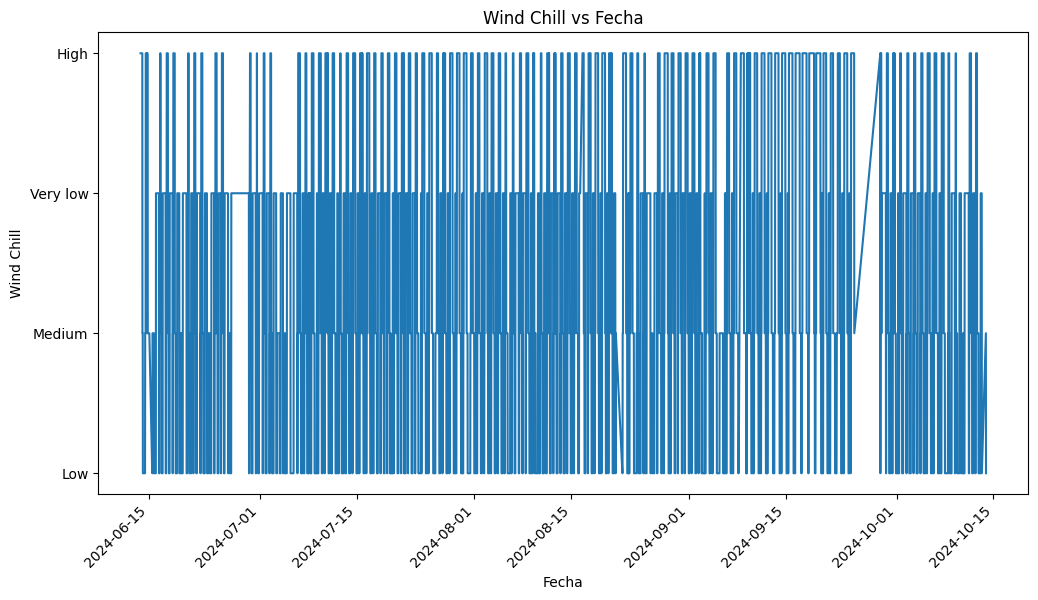

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna 'fecha' a datetime
df_wind_chill['fecha'] = pd.to_datetime(df_wind_chill['fecha'])

# Convertir las categorías de 'windChill' a valores numéricos
df_wind_chill['windChill_num'] = pd.factorize(df_wind_chill['windChill'])[0]

# 4. Wind Chill vs Fecha
plt.figure(figsize=(12, 6))
sns.lineplot(x='fecha', y='windChill_num', data=df_wind_chill)
plt.title('Wind Chill vs Fecha')
plt.xlabel('Fecha')
plt.ylabel('Wind Chill')

# Ajustar las etiquetas del eje Y para mostrar las categorías originales
plt.yticks(df_wind_chill['windChill_num'].unique(), df_wind_chill['windChill'].unique())  # <-- Aquí se agrega la línea

plt.xticks(rotation=45, ha='right')
plt.show()